In [1]:
import pandas as pd

data = {
    "Month": ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    "Sales": [10000, 12000, 15000, 13000, 17000, 16000],
    "Profit": [2000, 3000, 4000, 2500, 3500, 3000]
}

df = pd.DataFrame(data)

print(df)

  Month  Sales  Profit
0   Jan  10000    2000
1   Feb  12000    3000
2   Mar  15000    4000
3   Apr  13000    2500
4   May  17000    3500
5   Jun  16000    3000


In [2]:
df['Month']

0    Jan
1    Feb
2    Mar
3    Apr
4    May
5    Jun
Name: Month, dtype: object

In [3]:
df[['Month', 'Sales']]

,Month,Sales
0,Jan,10000
1,Feb,12000
2,Mar,15000
3,Apr,13000
4,May,17000
5,Jun,16000


# 1 - LINE PLOT MONTHLY SALES

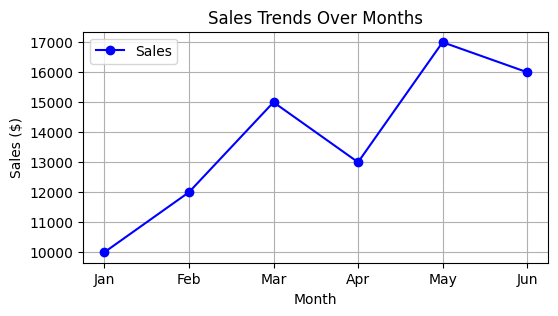

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.plot(df['Month'], df['Sales'], color='blue', marker='o', linestyle='-', label='Sales')
plt.title('Sales Trends Over Months')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.legend()
plt.show()

# 2 - BARPLOT MONTH vs PROFIT

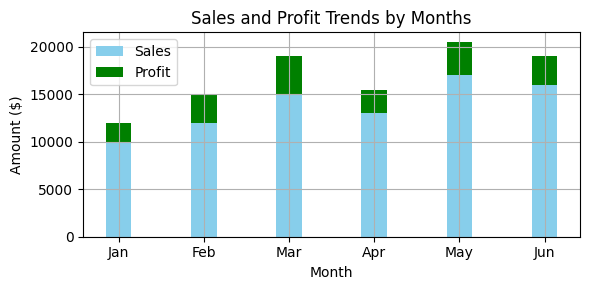

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
width = 0.3
plt.bar(df['Month'], df['Sales'], width=width, color='skyblue', label='Sales')
plt.bar(df['Month'], df['Profit'], width=width, color='green', label='Profit', bottom=df['Sales'])

plt.title('Sales and Profit Trends by Months')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 3 - PIE CHART PROFFIT VS MONTH

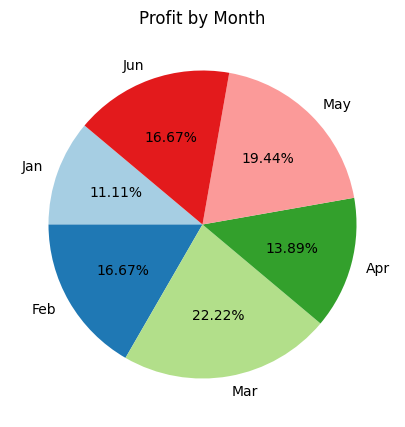

In [6]:
from enum import auto

plt.figure(figsize=(10,5))
plt.pie(df['Profit'], labels=df['Month'], autopct='%1.2f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Profit by Month')
plt.show()

# 4 - SCATTER PLOT

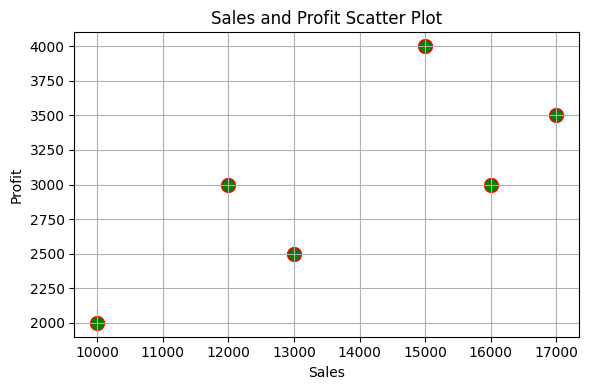

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(df['Sales'], df['Profit'], color='green', s=100, edgecolor='red')
plt.title('Sales and Profit Scatter Plot')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5 - HISTOGRAM PLOT

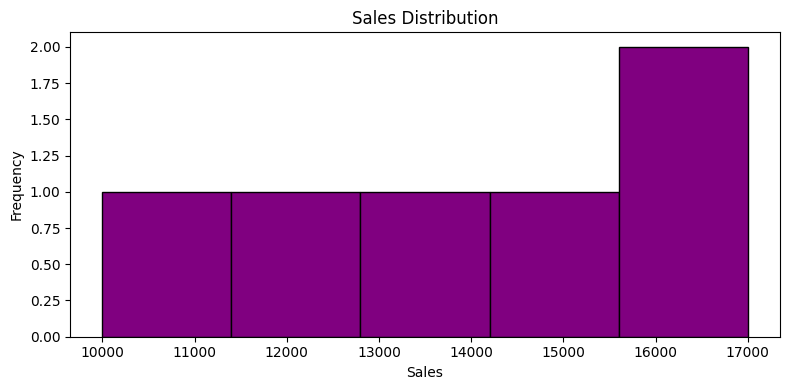

In [19]:
plt.figure(figsize=(8,4))
plt.hist(df['Sales'], bins=5, color='purple', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 6 - BOX PLOT

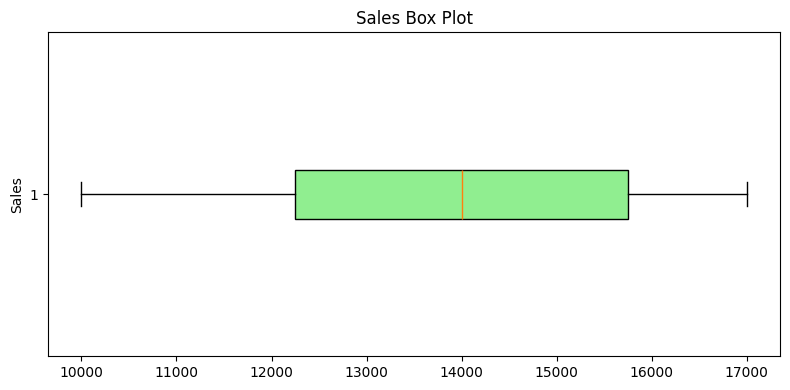

In [17]:
plt.figure(figsize=(8,4))
plt.boxplot(df['Sales'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Sales Box Plot')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# Gradio

In [22]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [28]:
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Month": ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    "Sales": [10000, 12000, 15000, 13000, 17000, 16000],
    "Profit": [2000, 3000, 4000, 2500, 3500, 3000]
}
df = pd.DataFrame(data)

def generate_plot(plot_type):
    fig = plt.figure(figsize=(8,5))

    if plot_type == 'Line Chart':
        plt.plot(df['Month'], df['Sales'], color='blue', marker='o', linestyle='-', label='Sales')
        plt.title('Sales Trends Over Months')
        plt.xlabel('Month')
        plt.ylabel('Sales ($)')
        plt.grid(True)
        plt.legend()
    elif plot_type == 'Bar Chart':
        fig.set_size_inches(10,6)
        width = 0.3
        plt.bar(df['Month'], df['Sales'], width=width, color='skyblue', label='Sales')
        plt.bar(df['Month'], df['Profit'], width=width, color='green', label='Profit', bottom=df['Sales'])
        plt.title('Sales and Profit Trends by Months')
        plt.xlabel('Month')
        plt.ylabel('Amount ($)')
        plt.grid(True)
        plt.legend()
    elif plot_type == 'Pie Chart':
        fig.set_size_inches(7,7)
        plt.pie(df['Profit'], labels=df['Month'], autopct='%1.2f%%', startangle=140, colors=plt.cm.Paired.colors)
        plt.title('Profit by Month')
    elif plot_type == 'Scatter Chart':
        plt.scatter(df['Sales'], df['Profit'], color='green', s=100, edgecolor='red')
        plt.title('Sales and Profit Scatter Plot')
        plt.xlabel('Sales')
        plt.ylabel('Profit')
        plt.grid(True)
    elif plot_type == 'Hist Chart':
        plt.hist(df['Sales'], bins=5, color='purple', edgecolor='black')
        plt.title('Sales Distribution')
        plt.xlabel('Sales')
        plt.ylabel('Frequency')
    elif plot_type == 'Box Chart':
        plt.boxplot(df['Sales'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
        plt.title('Sales Box Plot')
        plt.ylabel('Sales')

    plt.tight_layout()
    return fig

# gradio ui
demo = gr.Interface(
    fn=generate_plot,
    inputs=gr.Radio(['Line Chart', 'Bar Chart', 'Pie Chart', 'Scatter Chart', 'Hist Chart', 'Box Chart',]),
    outputs=gr.Plot(label="Sales Data Visualization"),
    title='Sales & Profit visual insight',
    description='Choose the plot type of visualize the data'
)

#demo.launch()
demo.launch(share=True)


* Running on local URL:  http://127.0.0.1:7864
* Running on public URL: https://996e1558656082f137.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
